### Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np

import cv2
from PIL import Image

import matplotlib.pyplot as plt

import tensorflow as tf

### Preprocessing the image 
* Read the image
* Converted to gray color from BGR by using openCV
* Image converted to numpy array
* Image is normalized
* Split every square containing the a number or empty space
* Split image resized for (28,28) due to we will use a model trained on MNIST data

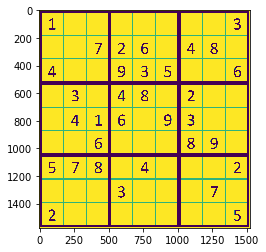

In [2]:
img = cv2.imread('images/sudoku_ex1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img);

In [3]:
array = np.array(img)
array.shape

(1575, 1525)

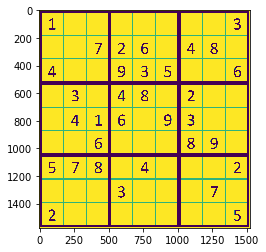

In [4]:
plt.imshow(array);

In [5]:
array.max()

255

In [6]:
array.min()

0

In [7]:
array = 255-array

#divisor for each number on vertical axis
divisor_v = array.shape[0]//9
#divisor for each number on horizantal axis
divisor_h = array.shape[1]//9

puzzle = []

for i in range(9):
    row = []
    for j in range(9):
        #slice image, reshape it to 28x28 (mnist reader size)
        row.append(cv2.resize(src=array[i*divisor_v:(i+1)*divisor_v,
                                        j*divisor_h:(j+1)*divisor_h][25:-25, 25:-25], #[20:-20, 20:-20] is to cut the edges
                              dsize=(28,28), 
                              interpolation=cv2.INTER_CUBIC))
    puzzle.append(row)

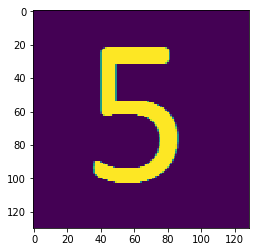

In [8]:
#Original image
plt.imshow(array[i*divisor_v:(i+1)*divisor_v,j*divisor_h:(j+1)*divisor_h][20:-25, 20:-20])

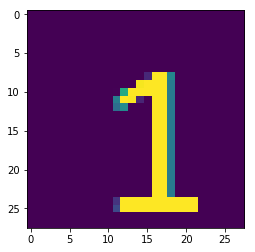

In [9]:
#resized image
plt.imshow(puzzle[0][0])

In [10]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [11]:
test_images.shape

(10000, 28, 28)

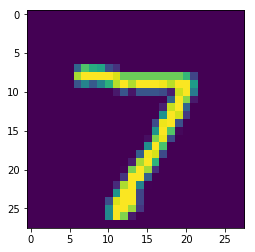

In [12]:
plt.imshow(test_images[0,:,:])

In [13]:
train_images = train_images.reshape(60000, 28, 28, 1).astype('float32')/255

series = pd.Series(train_labels)
dummies = pd.get_dummies(series)

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
__________

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
 model.fit(train_images,
           dummies, 
           epochs=2,
           batch_size=32,
           validation_data = [test_images.reshape(10000,28,28,1).astype('float32')/255,
                              pd.get_dummies(pd.Series(test_labels))])


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 1262s 21ms/step - loss: 0.4092 - acc: 0.8753 - val_loss: 0.0696 - val_acc: 0.9803
Epoch 2/2
60000/60000 [==============================] - 1209s 20ms/step - loss: 0.1472 - acc: 0.9603 - val_loss: 0.0554 - val_acc: 0.9841


In [17]:
model.predict_classes(puzzle[0][0].reshape(1,28,28,1).astype('float32')/255)

array([7])

In [18]:
model.save('model_weigths.hdf5')

In [19]:
model.load_weights('model_weigths.hdf5')

In [20]:
np.mean(puzzle[0][0])

22.165816326530614

In [21]:
np.mean(puzzle[0][8])

27.855867346938776

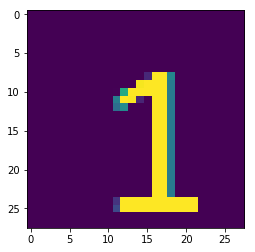

[7]


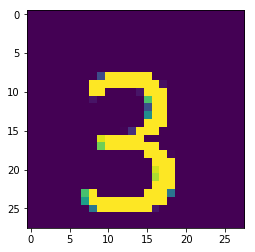

[3]


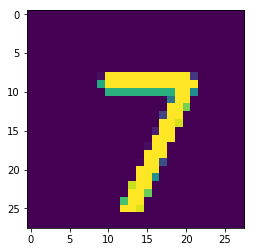

[7]


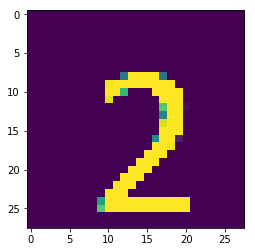

[7]


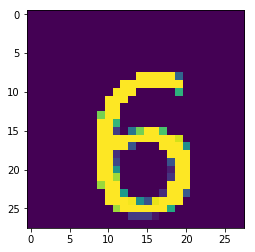

[5]


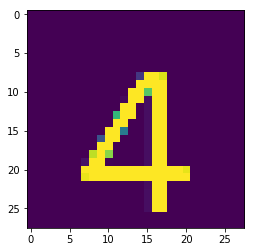

[2]


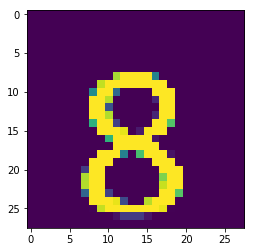

[8]


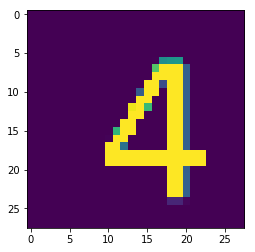

[2]


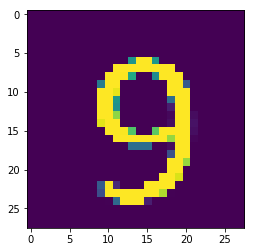

[9]


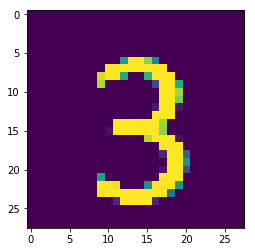

[3]


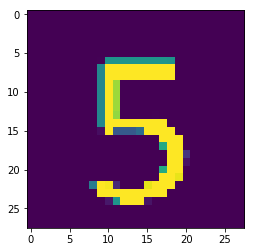

[5]


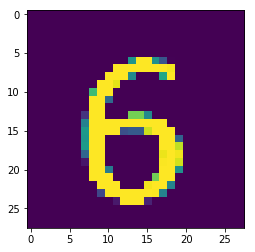

[5]


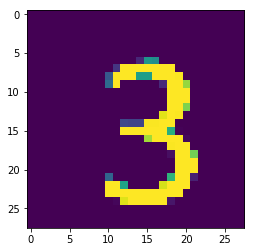

[3]


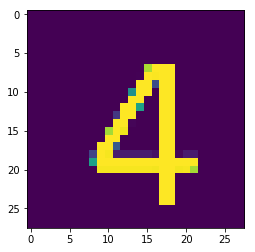

[0]


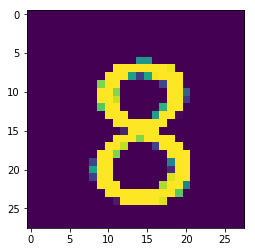

[8]


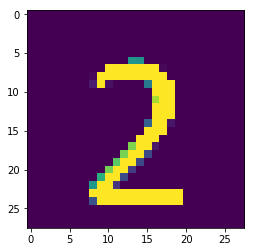

[2]


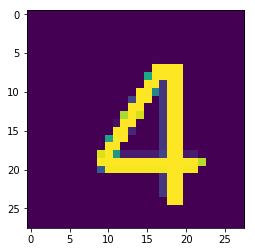

[2]


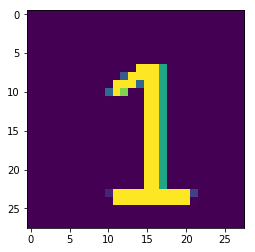

[3]


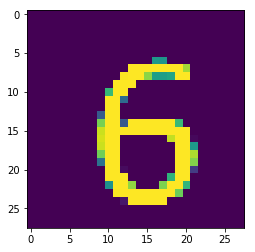

[5]


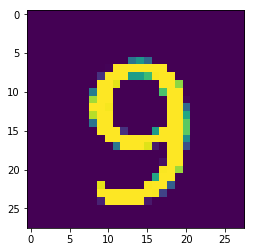

[9]


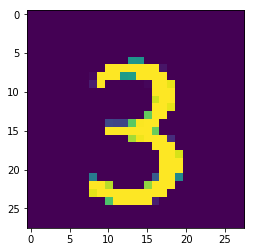

[3]


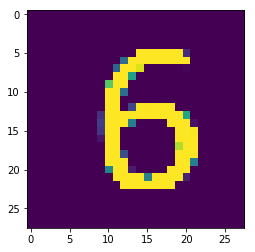

[6]


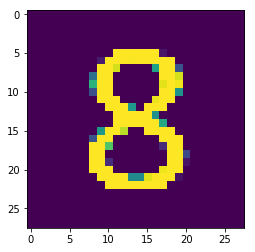

[8]


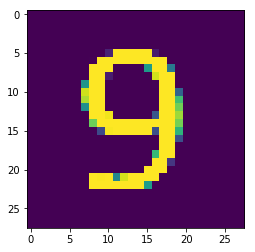

[9]


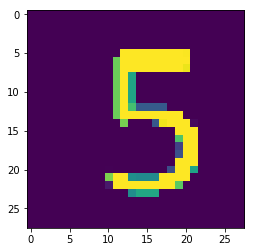

[5]


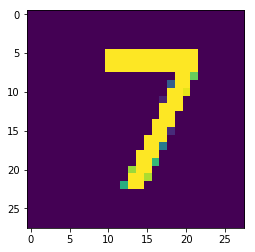

[7]


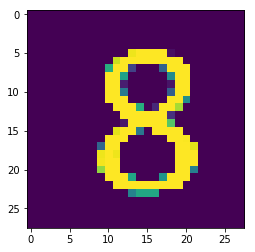

[8]


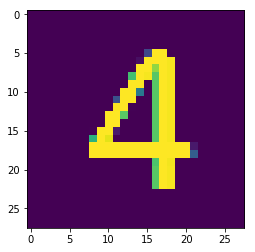

[4]


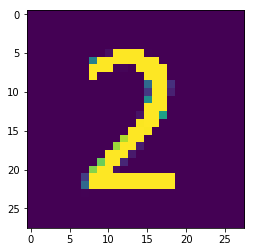

[2]


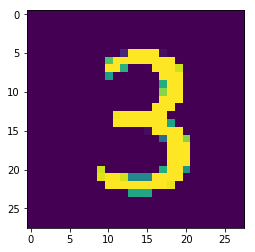

[3]


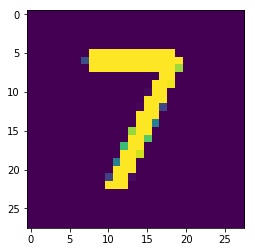

[7]


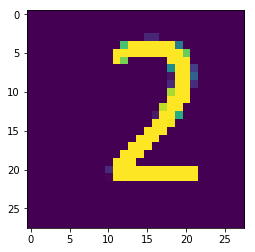

[2]


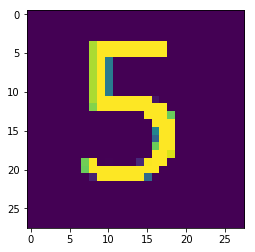

[5]
33


In [22]:
count = 0 
for row in puzzle:
    for spot in row:
        if np.mean(spot) > 6:
            count += 1
            plt.imshow(spot)
            plt.show()
            print(model.predict_classes(spot.reshape(1,28,28,1).astype('float32')/255))
            
print(count)

In [23]:
template = [[0 for _ in range(9)] for _ in range(9)]

In [24]:
template

[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [25]:
for i, row in enumerate(puzzle):
    for j, spot in enumerate(row):
        if np.mean(spot) > 6:
            template[i][j] = model.predict_classes(spot.reshape(1,28,28,1).astype('float32')/255)[0]

In [26]:
template

[[7, 0, 0, 0, 0, 0, 0, 0, 3],
 [0, 0, 7, 7, 5, 0, 2, 8, 0],
 [2, 0, 0, 9, 3, 5, 0, 0, 5],
 [0, 3, 0, 0, 8, 0, 2, 0, 0],
 [0, 2, 3, 5, 0, 9, 3, 0, 0],
 [0, 0, 6, 0, 0, 0, 8, 9, 0],
 [5, 7, 8, 0, 4, 0, 0, 0, 2],
 [0, 0, 0, 3, 0, 0, 0, 7, 0],
 [2, 0, 0, 0, 0, 0, 0, 0, 5]]

In [27]:
def findNextCellToFill(grid, i, j):
        for x in range(i,9):
                for y in range(j,9):
                        if grid[x][y] == 0:
                                return x,y
        for x in range(0,9):
                for y in range(0,9):
                        if grid[x][y] == 0:
                                return x,y
        return -1,-1

def isValid(grid, i, j, e):
        rowOk = all([e != grid[i][x] for x in range(9)])
        if rowOk:
                columnOk = all([e != grid[x][j] for x in range(9)])
                if columnOk:
                        # finding the top left x,y co-ordinates of the section containing the i,j cell
                        secTopX, secTopY = 3 *(i//3), 3 *(j//3) #floored quotient should be used here. 
                        for x in range(secTopX, secTopX+3):
                                for y in range(secTopY, secTopY+3):
                                        if grid[x][y] == e:
                                                return False
                        return True
        return False

def solveSudoku(grid, i=0, j=0):
        i,j = findNextCellToFill(grid, i, j)
        if i == -1:
                return True
        for e in range(1,10):
            if isValid(grid,i,j,e):
                grid[i][j] = e
                if solveSudoku(grid, i, j):
                    return True          # Undo the current cell for backtracking
                grid[i][j] = 0
        return False

In [28]:
solveSudoku(template)

False

In [29]:
def solve(sudoku):
    #using recursion and backtracking, here we go.
    empties = [(i,j) for i in range(9) for j in range(9) if sudoku[i][j] == 0]
    predict = lambda i, j: set(range(1,10))-set([sudoku[i][j]])-set([sudoku[y+range(1,10,3)[i//3]][x+range(1,10,3)[j//3]] for y in (-1,0,1) for x in (-1,0,1)])-set(sudoku[i])-set(list(zip(*sudoku))[j])
    if len(empties)==0:return True
    gap = next(iter(empties))
    predictions = predict(*gap)
    for i in predictions:
        sudoku[gap[0]][gap[1]] = i
        if solve(sudoku):return True
        sudoku[gap[0]][gap[1]] = 0
    return False

In [30]:
solve(template)

False

In [31]:
input = [[5,1,7,6,0,0,0,3,4],[2,8,9,0,0,4,0,0,0],[3,4,6,2,0,5,0,9,0],[6,0,2,0,0,0,0,1,0],[0,3,8,0,0,6,0,4,7],[0,0,0,0,0,0,0,0,0],[0,9,0,0,0,0,0,7,8],[7,0,3,4,0,0,5,6,0],[0,0,0,0,0,0,0,0,0]]
solve(input)

True